In [51]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

import seaborn as sns
sns.set_theme(style="whitegrid")

load_dotenv(override=True)
SQLALCHEMY_DATABASE_URI = os.getenv("DATABASE_URL")

# Préparation 

In [52]:
# Create an engine instance
alchemyEngine = create_engine(SQLALCHEMY_DATABASE_URI)

In [53]:
# Connect to PostgreSQL server

dbConnection = alchemyEngine.connect()

In [54]:
# Read data from PostgreSQL database table and load into a DataFrame instance

df_objet_perdu = pd.read_sql("select * from \"objet_perdu\"", dbConnection)
dbConnection.close()

In [55]:
df_objet_perdu

,id,date_heure_restitution,type,gare_origine,nature,nom_recordtype,date
0,1,2014-01-01 15:58:18,"Bagagerie: sacs, valises, cartables",Lille Europe,"Sac de voyage, sac de sport, sac à bandoulière",Objet trouvé,2013-12-31 18:22:43
1,2,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:48:55
2,3,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:45:16
3,4,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:43:11
4,5,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31 17:37:11
...,...,...,...,...,...,...,...
30927,30928,2023-01-02 16:07:54,"Appareils électroniques, informatiques, appare...",Lille Europe,"Téléphone portable protégé (étui, coque,…)",Objet trouvé,2023-01-02 05:56:37
30928,30929,NaT,Pièces d'identités et papiers personnels,Lille Europe,"Carte d'identité, passeport, permis de conduire",Objet trouvé,2023-01-01 17:28:30
30929,30930,NaT,"Appareils électroniques, informatiques, appare...",Lille Europe,"AirPod, casque audio, écouteurs",Objet trouvé,2023-01-01 14:58:24
30930,30931,2023-01-01 07:11:10,"Bagagerie: sacs, valises, cartables",Lille Europe,Sac à main,Objet trouvé,2023-01-01 07:03:54


In [56]:
df_objet_perdu.dtypes

id                                 int64
date_heure_restitution    datetime64[ns]
type                              object
gare_origine                      object
nature                            object
nom_recordtype                    object
date                      datetime64[ns]
dtype: object

In [57]:
df_objet_perdu['Year'] = df_objet_perdu['date'].dt.year
df_objet_perdu['Month'] = df_objet_perdu['date'].dt.month
df_objet_perdu['Day'] = df_objet_perdu['date'].dt.day_of_week
df_objet_perdu['semaine'] = df_objet_perdu["date"].dt.week
df_objet_perdu["date"] = df_objet_perdu["date"].dt.strftime('%Y-%m-%d')


C:\Users\gsoul\AppData\Local\Temp\ipykernel_20428\3985970090.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_objet_perdu['semaine'] = df_objet_perdu["date"].dt.week


In [58]:
df_objet_perdu

,id,date_heure_restitution,type,gare_origine,nature,nom_recordtype,date,Year,Month,Day,semaine
0,1,2014-01-01 15:58:18,"Bagagerie: sacs, valises, cartables",Lille Europe,"Sac de voyage, sac de sport, sac à bandoulière",Objet trouvé,2013-12-31,2013,12,1,1
1,2,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31,2013,12,1,1
2,3,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31,2013,12,1,1
3,4,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31,2013,12,1,1
4,5,NaT,Pièces d'identités et papiers personnels,Lille Europe,Carte d'abonnement,Objet trouvé,2013-12-31,2013,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...
30927,30928,2023-01-02 16:07:54,"Appareils électroniques, informatiques, appare...",Lille Europe,"Téléphone portable protégé (étui, coque,…)",Objet trouvé,2023-01-02,2023,1,0,1
30928,30929,NaT,Pièces d'identités et papiers personnels,Lille Europe,"Carte d'identité, passeport, permis de conduire",Objet trouvé,2023-01-01,2023,1,6,52
30929,30930,NaT,"Appareils électroniques, informatiques, appare...",Lille Europe,"AirPod, casque audio, écouteurs",Objet trouvé,2023-01-01,2023,1,6,52
30930,30931,2023-01-01 07:11:10,"Bagagerie: sacs, valises, cartables",Lille Europe,Sac à main,Objet trouvé,2023-01-01,2023,1,6,52


In [59]:
df_objet_perdu_groupby = df_objet_perdu.groupby(['Year', 'Month'])['Day'].count().reset_index()

In [60]:
df_objet_perdu_groupby_day = df_objet_perdu.groupby(['Year','Month','Day'])['id'].count().reset_index()
df_objet_perdu_groupby_day

,Year,Month,Day,id
0,2013,11,0,52
1,2013,11,1,53
2,2013,11,2,36
3,2013,11,3,47
4,2013,11,4,41
...,...,...,...,...
763,2023,1,0,9
764,2023,1,1,7
765,2023,1,2,6
766,2023,1,3,10


In [61]:
df_objet_perdu_by_month = df_objet_perdu_groupby.groupby(['Month'])['Day'].mean().reset_index().rename(columns={'Day':"Moyenne"})

# Moyenne par mois

In [62]:
df_objet_perdu_by_month

,Month,Moyenne
0,1,250.800000
1,2,266.222222
2,3,254.666667
3,4,275.000000
4,5,260.222222
5,6,303.777778
6,7,317.666667
7,8,276.777778
8,9,314.333333
9,10,313.333333


# Moyenne par jour

In [63]:
df_objet_perdu_by_month = df_objet_perdu_groupby_day.groupby(['Day'])['id'].mean().reset_index().rename(columns={'id':"Moyenne"})
df_objet_perdu_by_month

,Day,Moyenne
0,0,49.354545
1,1,39.918182
2,2,37.127273
3,3,42.581818
4,4,40.761468
5,5,40.688073
6,6,31.509091


In [64]:
df_objet_perdu.groupby(['Month'])['id'].count().reset_index()

,Month,id
0,1,2508
1,2,2396
2,3,2292
3,4,2200
4,5,2342
5,6,2734
6,7,2859
7,8,2491
8,9,2829
9,10,2820


# Affichez entre 2016 et 2022 la somme des objets perdus:

In [65]:
df_objet_perdu_filter_year = df_objet_perdu[(df_objet_perdu['Year']>2015) & (df_objet_perdu['Year']<2023)]

In [66]:
df_objet_perdu_filter_year.groupby(['Day'])['id'].count().reset_index()

,Day,id
0,0,4012
1,1,3128
2,2,2912
3,3,3359
4,4,3189
5,5,3095
6,6,2505


In [67]:
df_objet_perdu_filter_year.groupby(['semaine'])['id'].count().reset_index()

,semaine,id
0,1,409
1,2,405
2,3,412
3,4,412
4,5,445
5,6,437
6,7,433
7,8,433
8,9,400
9,10,431


In [68]:
df_objet_perdu_filter_year.groupby(['Month'])['id'].count().reset_index()

,Month,id
0,1,1833
1,2,1740
2,3,1690
3,4,1543
4,5,1701
5,6,1992
6,7,2121
7,8,1870
8,9,2113
9,10,2103


In [69]:
df_objet_perdu_filter_year.groupby(['Year'])['id'].count().reset_index()

,Year,id
0,2016,4131
1,2017,4614
2,2018,4364
3,2019,3005
4,2020,1526
5,2021,1915
6,2022,2645


In [70]:
df_sns = df_objet_perdu_filter_year.groupby(['Year','Month'])['id'].count().reset_index()

In [71]:
df_sns

,Year,Month,id
0,2016,1,310
1,2016,2,291
2,2016,3,321
3,2016,4,342
4,2016,5,321
...,...,...,...
78,2022,8,195
79,2022,9,251
80,2022,10,267
81,2022,11,228


Année : 2016


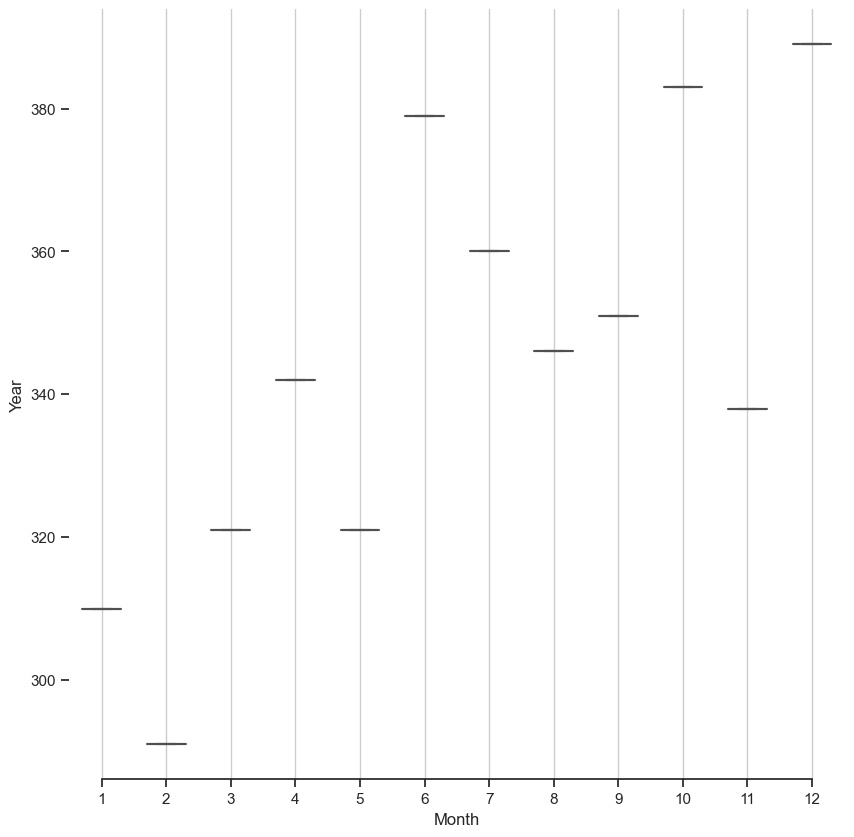

Année : 2017


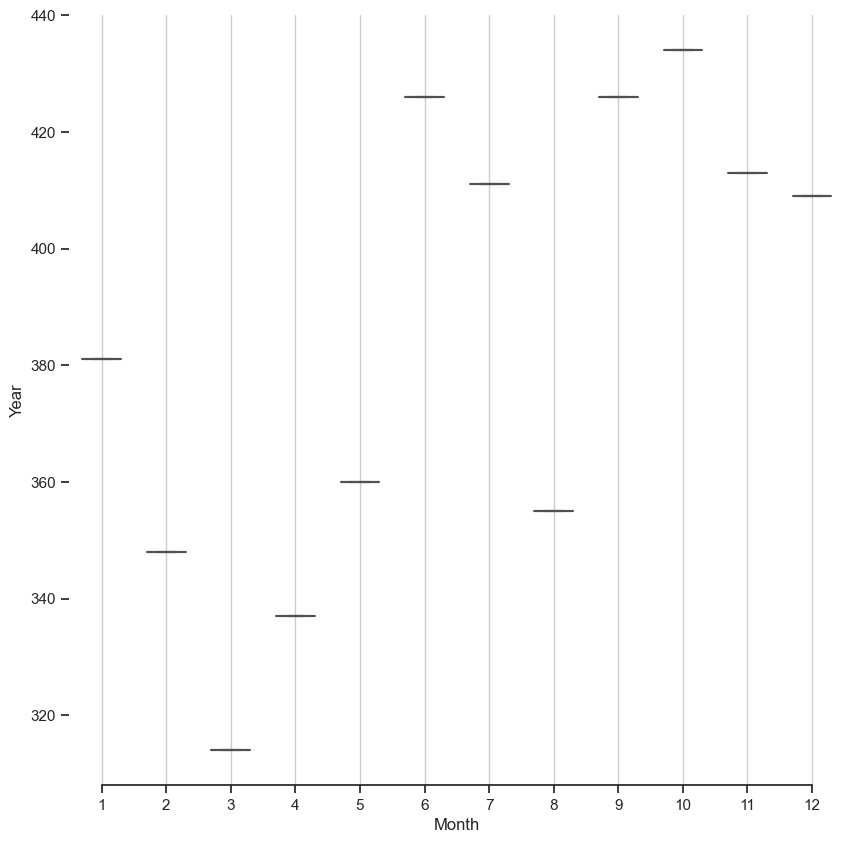

Année : 2018


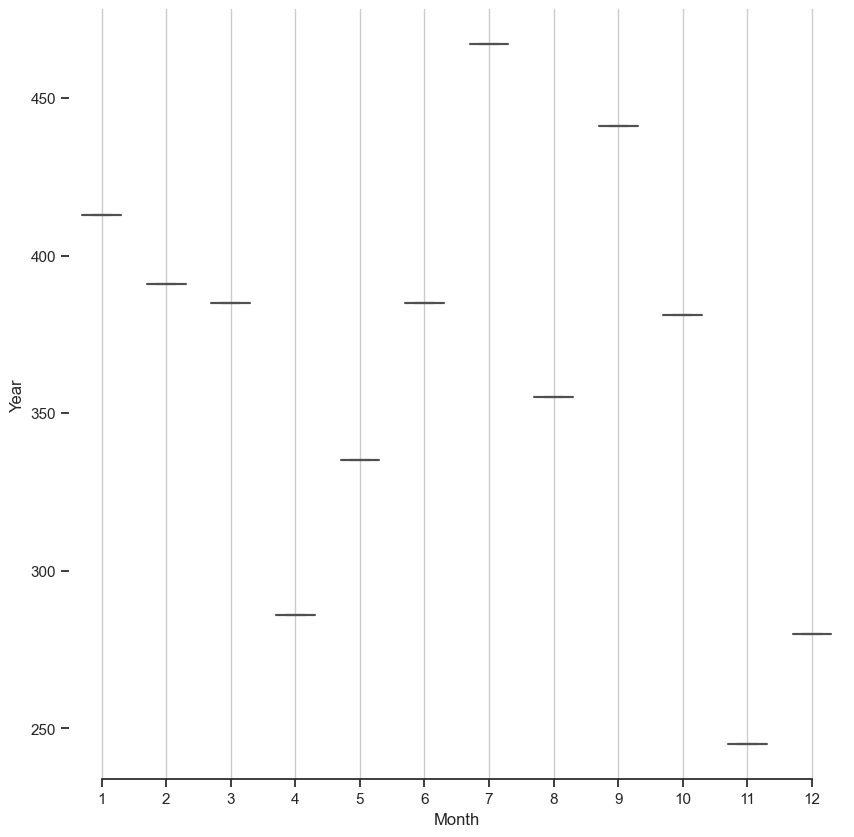

Année : 2019


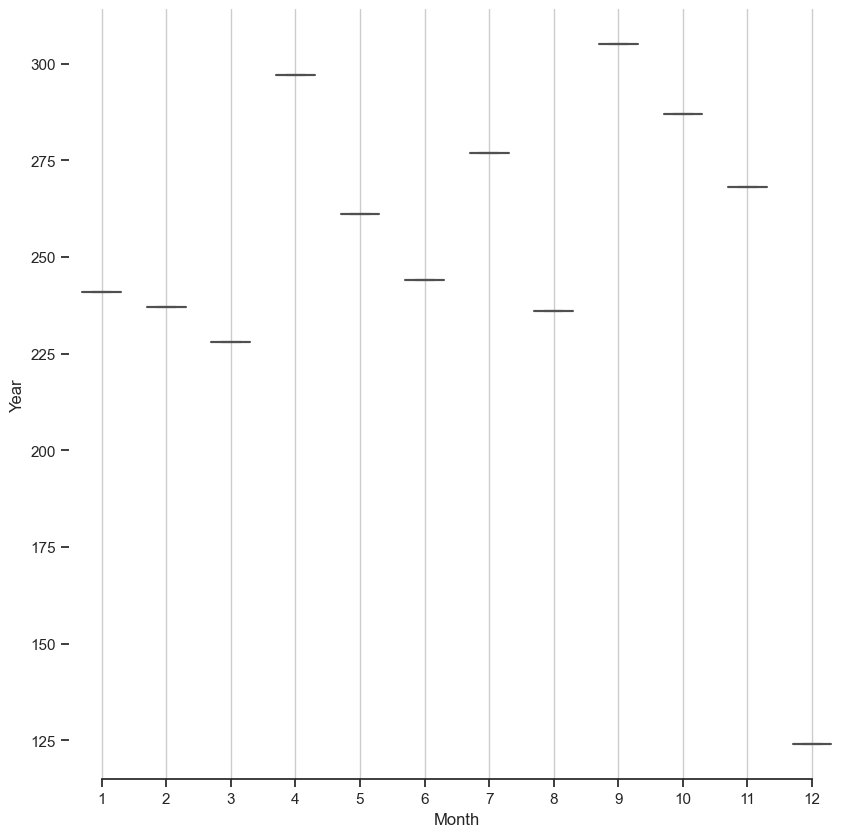

Année : 2020


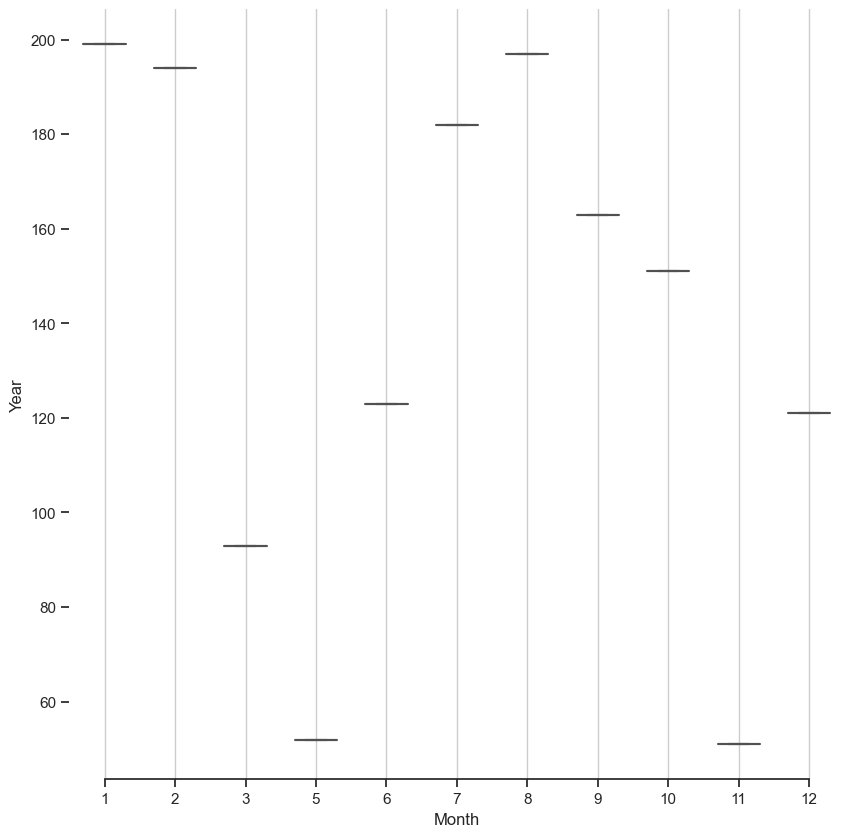

Année : 2021


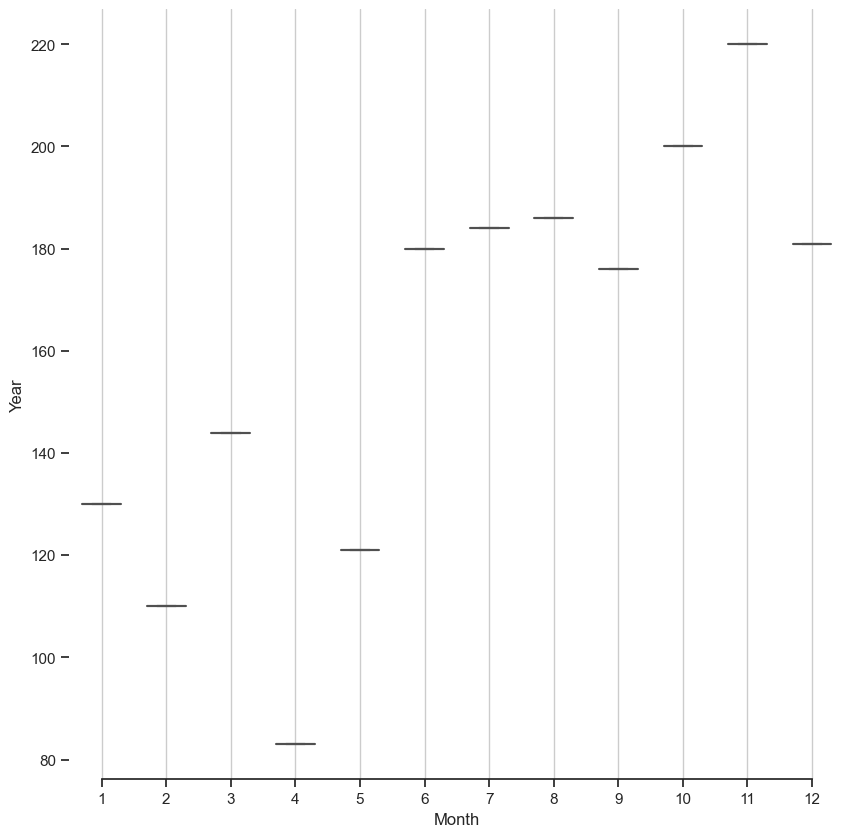

Année : 2022


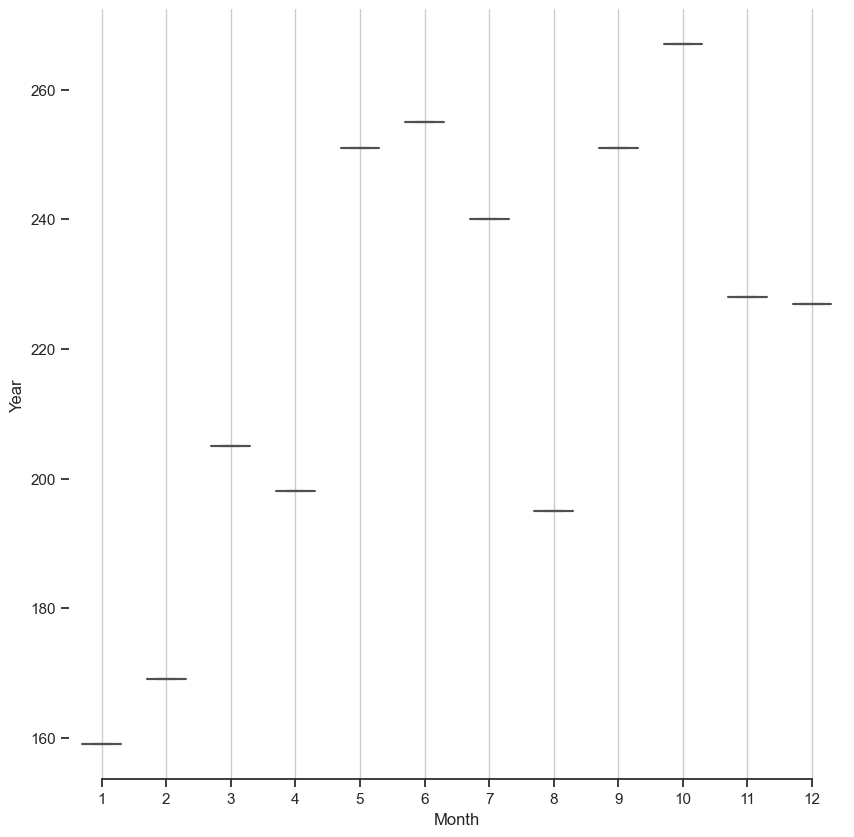

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis


for each_year in df_sns.Year.unique():
    f, ax = plt.subplots(figsize=(10, 10))
    print(f'Année : {each_year}')
    df_filter = df_sns[df_sns['Year']==each_year]
# Plot the orbital period with horizontal boxes
    sns.boxplot(x="Month", y="id", data=df_filter,
                whis=[0, 100], width=.6, palette="vlag",)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Year")
    sns.despine(trim=True, left=True)
    plt.show()